In [3]:
%matplotlib inline

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

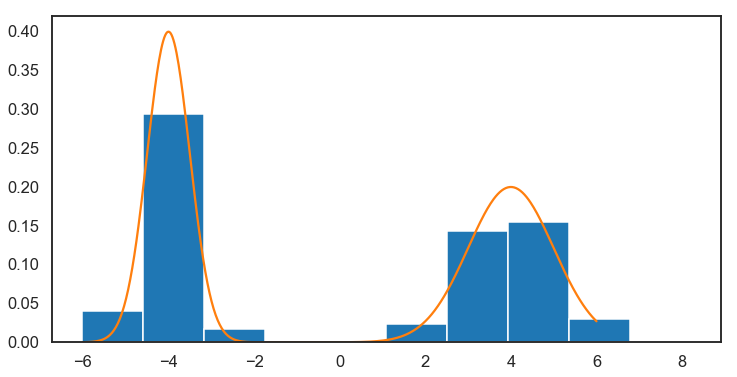

In [46]:
def p(x):
    return 0.5*sts.norm.pdf(x, loc=-4, scale=0.5)+ 0.5*sts.norm.pdf(x, loc=4, scale=1)

def q_rvs(x_t,epsilon):
    return sts.norm(loc=x_t, scale=epsilon).rvs()

def q_pdf(x_sample,x_t,epsilon):
    return sts.norm(loc=x_t, scale=epsilon).pdf(x_sample)

data_samples = np.concatenate((sts.norm.rvs(loc=-4, scale=0.5,size=50000), sts.norm.rvs(loc=4, scale=1,size=50000)))
plt.figure(figsize=(12, 6))
x = np.linspace(-6,6,500)
plt.hist(data_samples,density = True)
plt.plot(x,p(x))
plt.show()

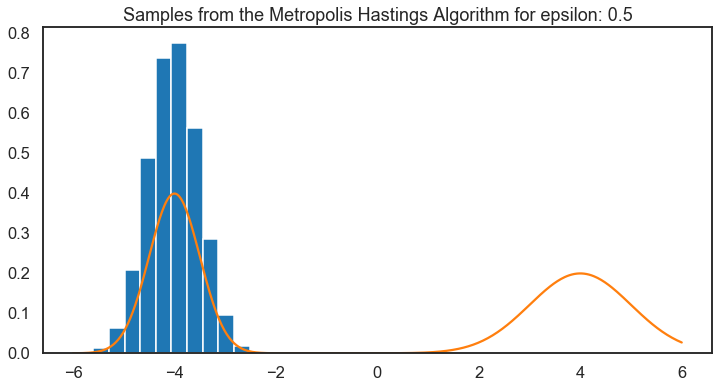

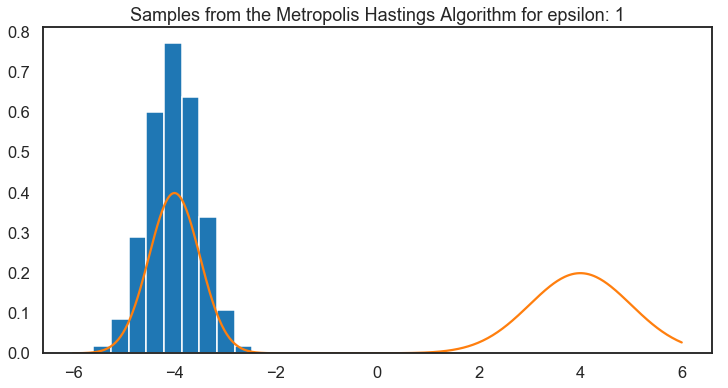

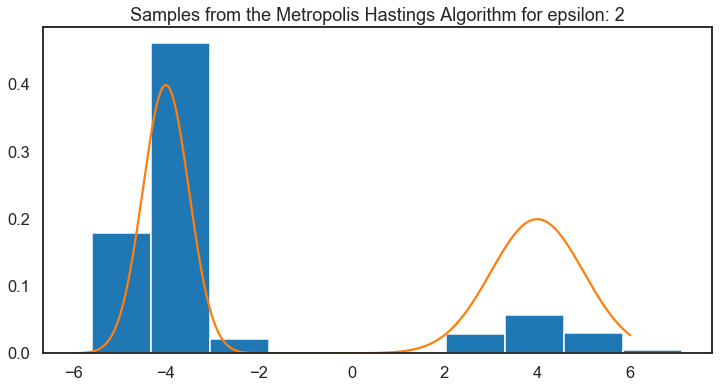

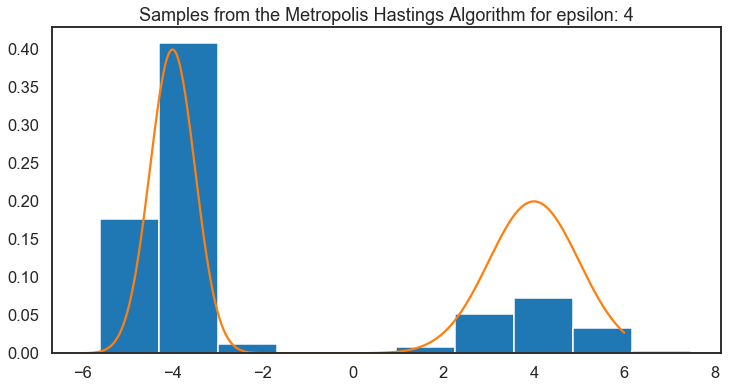

In [61]:
x_t = -5
epsilons = [0.5,1,2,4]
all_samples = []
accepted_samples = []

for epsilon in epsilons:
    for i in range(0,5000):
        sample = q_rvs(x_t,epsilon)
        all_samples.append(sample)
    
        acceptance_rate = (p(sample)*q_pdf(sample,x_t,epsilon))/(p(x_t)*q_pdf(x_t,sample,epsilon))
        a = np.random.uniform(0,1)
        if acceptance_rate >= a:
            accepted_samples.append(sample)
            x_t = sample
        
    plt.figure(figsize=(12, 6))
    x = np.linspace(-6,6,500)
    plt.hist(accepted_samples,density=True)
    plt.plot(x,p(x))
    plt.title('Samples from the Metropolis Hastings Algorithm for epsilon: ' + str(epsilon))
    plt.show()

a) The acceptance rate is the ratio of the likelihoods for the sample and the value of x(t).
b) The samples are quite correlated to the PDFs in terms of their variation and the trend that they're following. They follow the PDF very well and hence, are correlated to the probability function defined by us. 
c) The value of epsilon for 2 seems the best as it captures a good portion of the second PDF which is not even captured by the epsilon of 0.5 and 1. The value of 4 for epsilon does a similar job and there are no big improvements beyond e = 2. 